# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

3. Why is the Gini a good loss function for categorical target variables? 

4. Why do trees tend to overfit, and how can this tendency be constrained? 

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees are bulit from top-down, starting at the root node. From there, the algorithm chooses the feature that best splits the data to reduce the loss function. The splitting continues and it creates decision nodes and ends with leaf nodes, which give predictions.
2. Trees can handle non-linear relationships because they split data into discrete regions rather than assuming a straight line. Trees can split on a feature at multiple values, which creates a step-like function. Linear models assume that the relationship between the variables and the target is a straight line.
3. It's a good loss function for categorical target variables it measures how often a randomly chosen item from a node would be incorrectly labeled if it were labeled based on the distribution in that node. It favors splits that result in purer child nodes and build effective classifiers.
4. Trees tend to overfit because they keep splitting until each leaf contains very few samples.
5. This is false. Trees perform well in both categorical and numerical features. Since they don't assume linearity, the work well with more complex or mixed data.
6. Most versions of classification don't allow more than two branches after a split because they want to keep the algorithm simple. Too many branches can make trees less interpretable and can lead to overfitting.
7. You can examine a tree and decide its fit by looking at its features. If it's deep and has many nodes, it could be overfitting. If the tree is predicting well on training data but poorly on test data, it could be overfitting as well. If the tree is shallow and misses patterns, it could be underfitting. If leaf nodes have few samples, it may be memorizing instead of generalizing.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

#### 2.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
cars = pd.read_csv("./data/cars_hw.csv")
print(cars.head())
print(cars.shape)
print("Columns:", cars.columns.tolist())

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
(976, 12)
Columns: ['Unnamed: 0'

There are 976 observations/rows and 12 variables/columns.

#### 2.2

In [9]:
from sklearn.model_selection import train_test_split

#categorical
cat_vars = ['Make','Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']

#numeric
num_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']

#target
target = 'Price'

#one hot encoding categorical
cars_encoded = pd.get_dummies(cars[cat_vars+num_vars], drop_first=True)

X=cars_encoded
y=cars[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)

#### 2.3

In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

test_scores = []

for leaf_size in range(1,26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=58)
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    r2=r2_score(y_test, y_pred_test)

    test_scores.append(r2)
best_leaf = test_scores.index(max(test_scores)) +1 #range starts at 1
best_r2 = max(test_scores)
print(best_leaf)
print(best_r2)

4
0.8548265379244824


The best min_samples_leaf is 4 and the best Test R^2 is 0.8548.

#### 2.4

In [21]:
#optimal was 4
final_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=58)
final_model.fit(X_train, y_train)

#predict
y_pred_tree = final_model.predict(X_test)

#r2 and RMSW on test set
r2= r2_score(y_test, y_pred_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"Test R^2: {r2:.4f}")
print(f"Test RMSE: {rmse:.2f}")

Test R^2: 0.8548
Test RMSE: 137512.42


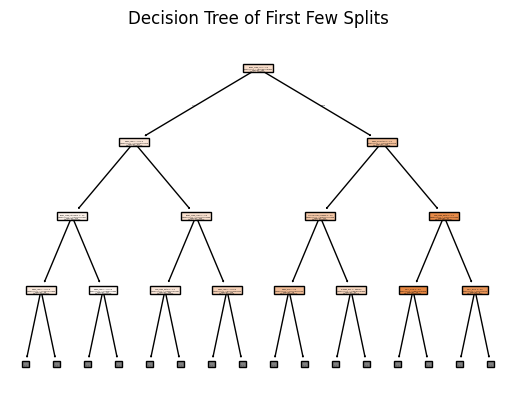

In [22]:
#decision tree
plot_tree(final_model, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Decision Tree of First Few Splits")
plt.show()


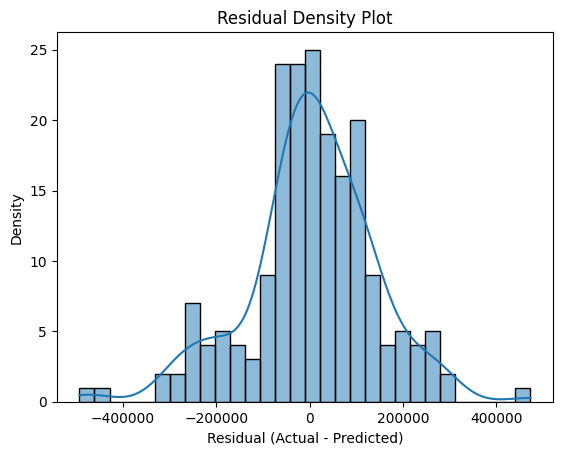

In [23]:
#residuals
residuals = y_test - y_pred_test

sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Density Plot")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Density")
plt.show()

The density is bell-shaped and centered at 0. The residuals are symmetrically distributed.

#### 2.5

In [24]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

#predict
y_pred_linear = linreg.predict(X_test)

In [25]:
#evaluate
r2_lin = r2_score(y_test, y_pred_linear)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Linear Test R^2: {r2_lin:.4f}")
print(f"Linear Test RMSE: {rmse_lin:.2f}")

Linear Test R^2: 0.8247
Linear Test RMSE: 151091.30


The regression tree performs better on the test set because it has a higher R^2 (0.8548 vs 0.8247). It also has lower RMSE compared to the linear regression. This means that the tree can capture complex patterns that the linear regression cannot.

#### 2.6

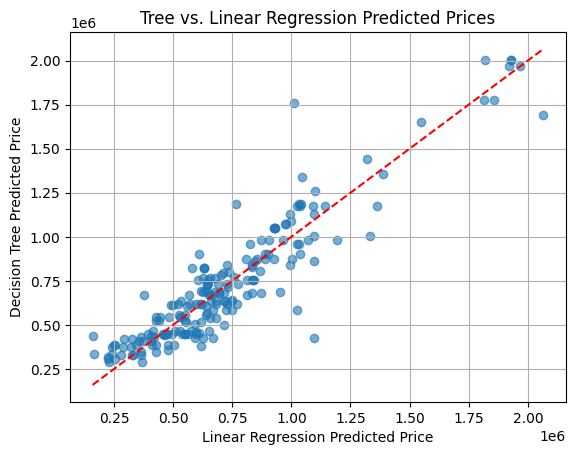

In [ ]:
plt.scatter(y_pred_linear, y_pred_tree, alpha =0.6)
plt.plot([y_pred_linear.min(), y_pred_linear.max()], [y_pred_linear.min(), y_pred_linear.max()], 'r--')

plt.xlabel("Linear Regression Predicted Price")
plt.ylabel("Decision Tree Predicted Price")
plt.title("Tree vs. Linear Regression Predicted Prices")
plt.grid(True)
plt.show()

The tree and linear regression models are predicting similar values, which means that they are modeling the data similarly. We also see that the models are predicting mostly "lower" prices (below one million), meaning that it reflects that expensive cars are rare in this dataset.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?